In [28]:
import numpy as np

In [29]:
X = 2 * np.random.rand(100, 1)

In [30]:
y = 4 + 3 * X + np.random.randn(100, 1)

In [31]:
import matplotlib.pyplot as plt

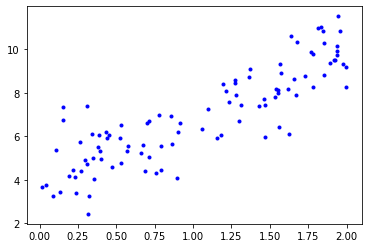

In [32]:
plt.plot(X, y, "b.")

In [33]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance

In [34]:
print(X_b[:10])

[[1.         1.97888744]
 [1.         1.55080789]
 [1.         1.27235281]
 [1.         0.21634015]
 [1.         1.76544149]
 [1.         1.94035993]
 [1.         0.23310441]
 [1.         1.83564067]
 [1.         0.71035728]
 [1.         0.52918495]]


In [35]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [36]:
theta_best

array([[3.86564463],
       [2.9580015 ]])

In [37]:
X_new = np.array([[0],[2]])

In [38]:
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance

In [41]:
y_predict = X_new_b.dot(theta_best)

In [42]:
y_predict

array([[3.86564463],
       [9.78164762]])

ValueError: x and y must have same first dimension, but have shapes (100, 1) and (2, 1)

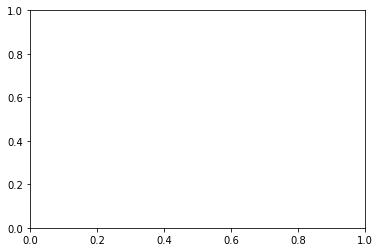

In [100]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lin_reg = LinearRegression()

In [51]:
lin_reg.fit(X, y)

LinearRegression()

In [53]:
lin_reg.intercept_, lin_reg.coef_

(array([3.86564463]), array([[2.9580015]]))

In [54]:
lin_reg.predict(X_new)

array([[3.86564463],
       [9.78164762]])

In [55]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [56]:
theta_best_svd

array([[3.86564463],
       [2.9580015 ]])

In [57]:
np.linalg.pinv(X_b).dot(y)

array([[3.86564463],
       [2.9580015 ]])

In [58]:
eta = 0.1 # learning rate

In [59]:
n_iterations = 1000

In [60]:
m = 100

In [61]:
theta = np.random.randn(2,1) # random initialization

In [65]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [66]:
theta

array([[3.86564463],
       [2.9580015 ]])

In [70]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [71]:
theta

array([[3.81309307],
       [3.05278155]])

In [83]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [84]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.86480781]), array([3.0167447]))

In [85]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

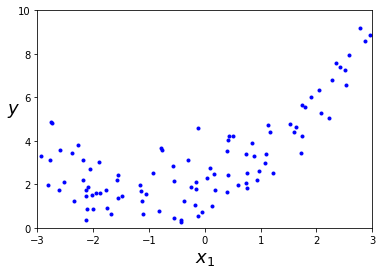

In [98]:
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [91]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.15636315])

In [92]:
X_poly[0]

array([-0.15636315,  0.02444943])

In [94]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.95289322]), array([[0.93375849, 0.48003077]]))

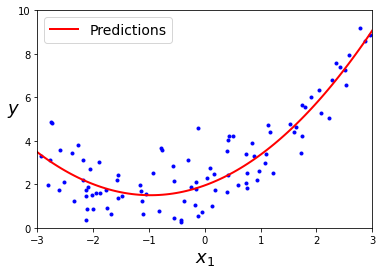

In [96]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [117]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    

Text(0, 0.5, 'RMSE')

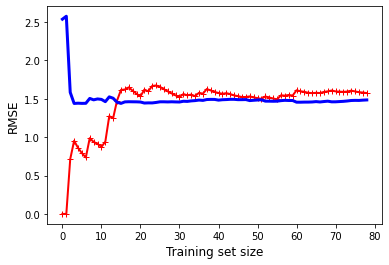

In [121]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.xlabel("Training set size", fontsize=12)
plt.ylabel("RMSE", fontsize=12)

In [122]:
from sklearn.pipeline import Pipeline

(0.0, 80.0, 0.0, 3.0)

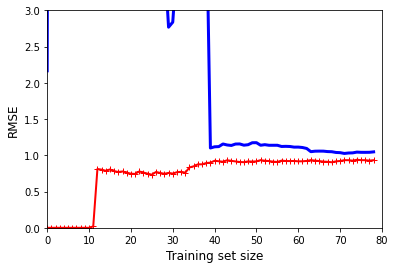

In [134]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.xlabel("Training set size", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.axis([0, 80, .0, 3.0])

NameError: name 'save_fig' is not defined

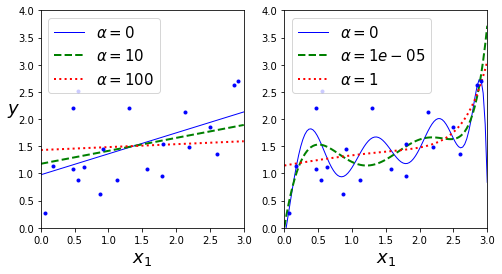

In [144]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()


In [145]:
from sklearn.linear_model import Ridge

In [146]:
ridge_reg = Ridge(alpha=1, solver="cholesky")

In [147]:
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [148]:
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [149]:
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.49905184])

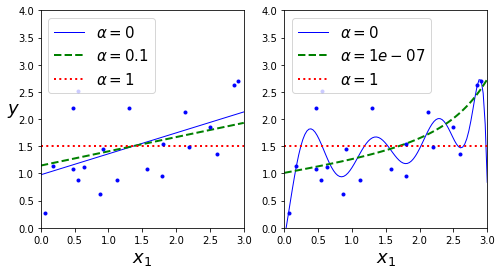

array([1.54333232])

In [151]:

from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

plt.show()

#%%

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

#%%

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])